In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el CSV exportado desde Power BI
df = pd.read_csv('/content/data.csv')


In [5]:
df.head()

,No_,Suma de TotalVentas,Suma de TotalCoste,Suma de UnidadesVendidas,Suma de ClientesUnicos,TipoProducto
0,NaN,9.138500e+06,12423.515395,160590.377271,243,Otro
1,EL0012,4.270216e+02,182.110843,382.235164,22,Elaborado
2,EL025101,1.544769e+02,80.137908,37.406061,7,Elaborado
3,EL025102,2.296442e+03,1138.392122,623.476325,42,Elaborado
4,EL025102K,1.944971e+01,5.380358,2.564935,2,Elaborado


In [11]:
# Seleccionamos solo las columnas numéricas que usaremos en el clustering
variables = ["Suma de TotalVentas", "Suma de TotalCoste", "Suma de UnidadesVendidas", "Suma de ClientesUnicos"]

In [10]:
print(df.columns.tolist())

['No_', 'Suma de TotalVentas', 'Suma de TotalCoste', 'Suma de UnidadesVendidas', 'Suma de ClientesUnicos', 'TipoProducto']


In [12]:
X = df[variables]

In [13]:
# Estandarizar (muy importante para K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
inertia = []

# Probar distintos valores de k (número de clusters)
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

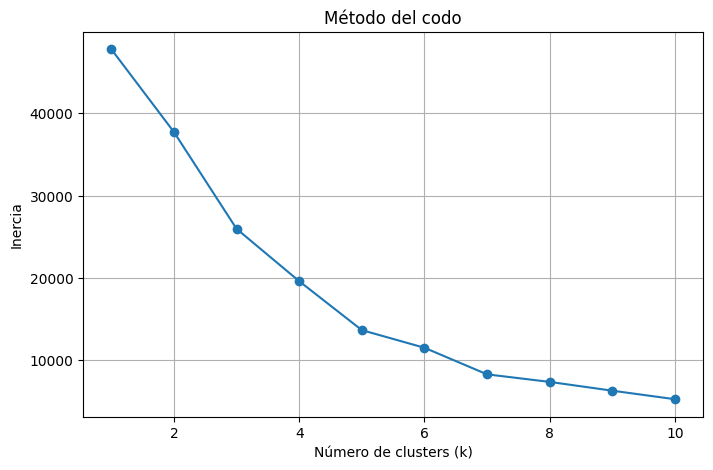

In [16]:
# Grafico curva de codo
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

In [17]:
# Elegimos un número de clusters (por ejemplo 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Revisar cómo quedaron los productos agrupados
df.groupby("Cluster")[variables].mean()

,Suma de TotalVentas,Suma de TotalCoste,Suma de UnidadesVendidas,Suma de ClientesUnicos
Cluster,,,,
0,2.670981e+03,1873.831695,7.112617e+03,13.601919
1,5.303092e+04,26763.062504,4.318242e+04,87.043213
2,9.138500e+06,12423.515395,1.605904e+05,243.000000
3,1.231885e+06,688502.511569,3.747888e+06,102.208333


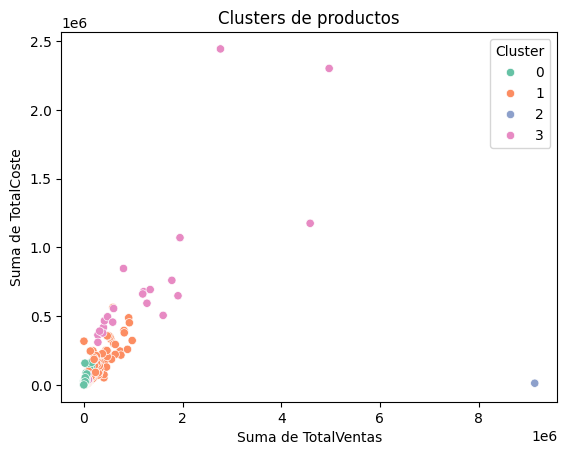

In [19]:
# Representación bidimensional con dos variables clave
sns.scatterplot(data=df, x="Suma de TotalVentas", y="Suma de TotalCoste", hue="Cluster", palette="Set2")
plt.title("Clusters de productos")
plt.show()

In [22]:
df["ClusterNombre"] = df["Cluster"].map({
    0: "Baja rotación",
    1: "Catálogo medio",
    2: "Muy rentable (revisar)",
    3: "Alta rotación / Clave"
})

In [23]:
df.to_csv("productos_clasificados.csv", index=False)

In [24]:
from google.colab import files
files.download("productos_clasificados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>